In [4]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

In [5]:
audio_dataset_path='C:/Users/oceanvue/Desktop/DeepShip Dataset'
metadata=pd.read_csv('C:/Users/oceanvue/Desktop/DeepShip Dataset/metadata-detailed.csv')
metadata.head()

,Recording ID,File_name,Folder_ID,Class_ID,Class,File_path,Ship Name,Date of Recording,Time of Recording,Durations (s),Distance (m)
0,1,1.wav,1,1,Cargo,Cargo\1\1.wav,SEASPAN SWIFT,20171104,203623,458,1583-1981
1,2,2.wav,2,1,Cargo,Cargo\2\2.wav,ISTRA ACE,20171104,223241,441,1535-1779
2,3,3.wav,3,1,Cargo,Cargo\3\3.wav,SAMOS WARRIOR,20171105,84406,297,642-1520
3,4,4.wav,4,1,Cargo,Cargo\4\4.wav,NYK REMUS,20171106,115234,331,1579-1906
4,5,5.wav,5,1,Cargo,Cargo\5\5.wav,SEASPAN RELIANT,20171107,452,208,477-1241


In [6]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    print(file_name)
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    return mfccs_scaled_features

In [7]:
# audio_dataset_path='C:/Users/oceanvue/Desktop/DeepShip Dataset'
# metadata=pd.read_csv('C:/Users/oceanvue/Desktop/DeepShip Dataset/metadata-detailed.csv')
# metadata.head()

# import numpy as np
# from tqdm import tqdm
# ### Now we iterate through every audio file and extract features 
# ### using Mel-Frequency Cepstral Coefficients
# extracted_features=[]
# for index_num,row in tqdm(metadata.iterrows()):
#     file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
#     final_class_labels=row["class"]
#     data=features_extractor(file_name)
#     extracted_features.append([data,final_class_labels])

Imp

In [8]:
# import numpy as np
# from tqdm import tqdm

# # Initialize a list to store extracted features and labels
# extracted_features = []

# # Iterate through metadata and extract features
# for index_num, row in tqdm(metadata.iterrows()):
#     file_name = os.path.join(os.path.abspath(audio_dataset_path), row['Class'], str(row['Folder_ID']), row['File_name'])

#     final_class_label = row['Class']
#     data = features_extractor(file_name)
#     extracted_features.append([data, final_class_label])

0it [00:00, ?it/s]

609it [25:31,  2.52s/it]


In [182]:
extracted_features

[[array([-3.51625122e+02,  8.68726273e+01, -1.49802084e+01,  2.12550373e+01,
         -7.73253870e+00,  1.45975780e+01, -4.06543827e+00,  1.45205088e+01,
         -7.56530857e+00,  7.25171375e+00, -1.26351185e+01,  1.13892441e+01,
         -7.16151810e+00,  8.56386757e+00, -7.48543549e+00,  7.83648443e+00,
         -8.05403614e+00,  7.75935173e+00, -2.12605739e+00,  9.10551548e+00,
         -5.11901236e+00,  9.68615341e+00, -6.11997485e-01,  8.58005714e+00,
         -3.74677181e-01,  6.18445063e+00, -1.55947936e+00,  4.86904812e+00,
         -8.25706005e-01,  3.44320488e+00, -2.29002357e+00,  3.84449553e+00,
          8.54418576e-01,  3.36997962e+00, -6.71508431e-01,  2.61769676e+00,
          1.00520644e-02,  2.96698213e+00,  2.92615986e+00,  7.46389961e+00],
        dtype=float32),
  'Cargo'],
 [array([-4.3363748e+02,  1.0278814e+02,  4.2636442e+00,  3.1529789e+01,
         -8.7992692e-01,  1.6512604e+01,  2.8421414e+00,  1.9528469e+01,
         -4.4790411e+00,  1.0194255e+01, -3.970

In [166]:
extracted_features_df = pd.DataFrame(extracted_features, columns=["Features", "Class"])

In [183]:
# Convert the list to a DataFrame
extracted_features_df = pd.DataFrame(extracted_features, columns=["Features", "Class"])

# extracted_features_df['Features'] = extracted_features_df['Features'].apply(lambda x: str(x))

# Save the DataFrame to a CSV file
# extracted_features_df.to_csv('extracted_features_df.csv', index=False)

In [190]:
extracted_features_df

,Features,Class
0,"[-351.62512, 86.87263, -14.980208, 21.255037, ...",Cargo
1,"[-433.63748, 102.78814, 4.263644, 31.529789, -...",Cargo
2,"[-459.4379, 118.98667, 14.566436, 32.147232, 1...",Cargo
3,"[-503.51062, 129.89467, 12.606634, 29.421463, ...",Cargo
4,"[-290.6702, 115.29109, -9.099596, 26.168022, -...",Cargo
...,...,...
604,"[-497.346, 64.05011, -9.535233, 23.641584, -7....",Tug
605,"[-507.68927, 109.86592, 2.8518202, 18.831621, ...",Tug
606,"[-408.82434, 100.63271, -5.6173587, 23.328585,...",Tug
607,"[-433.46265, 86.5696, -6.832019, 20.460762, -1...",Tug


In [197]:
import ast
import json

daat = extracted_features_df

daat['Features'] = daat['Features'].apply(lambda x: x.tolist())

file_name = "data.csv"

daat.to_csv(file_name, index=False)

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

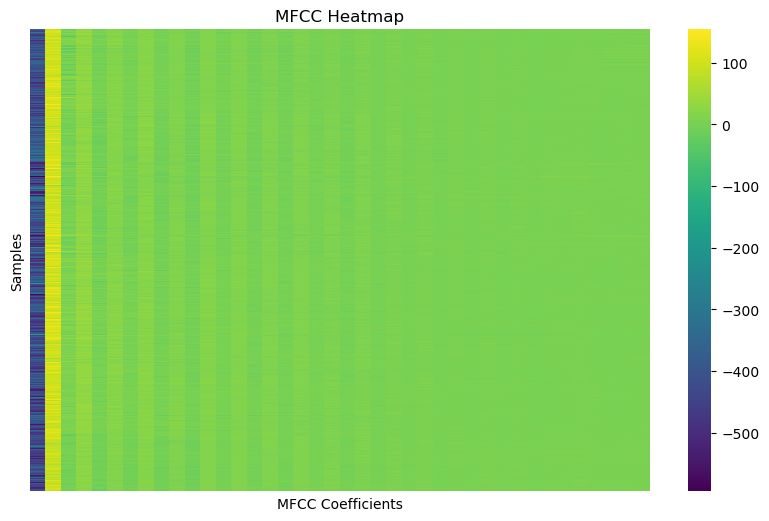

In [12]:
mfcc_array = np.array(extracted_features_df['Features'].tolist())

plt.figure(figsize=(10, 6))
sns.heatmap(mfcc_array, cmap='viridis', annot=False, xticklabels=False, yticklabels=False)
plt.title('MFCC Heatmap')
plt.xlabel('MFCC Coefficients')
plt.ylabel('Samples')
plt.show()

-------------
Model Work

In [13]:
X=np.array(extracted_features_df['Features'].tolist())
y=np.array(extracted_features_df['Class'].tolist())

In [14]:
X.shape

(609, 40)

In [40]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

y = label_encoder.fit_transform(extracted_features_df['Class'])

print("Encoded Labels:", encoded_labels)

Encoded Labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 

In [15]:
### Label Encoding
y=np.array(pd.get_dummies(y))

In [16]:
y.shape

(609, 4)

In [37]:
y

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       ...,
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1]], dtype=uint8)

In [235]:
extracted_features_df

,Features,Class
0,"[-351.6251220703125, 86.87262725830078, -14.98...",Cargo
1,"[-433.6374816894531, 102.78813934326172, 4.263...",Cargo
2,"[-459.4378967285156, 118.9866714477539, 14.566...",Cargo
3,"[-503.5106201171875, 129.89466857910156, 12.60...",Cargo
4,"[-290.6701965332031, 115.29109191894531, -9.09...",Cargo
...,...,...
603,"[-523.32421875, 94.79275512695312, -4.60109758...",Tug
604,"[-497.34600830078125, 64.05010986328125, -9.53...",Tug
605,"[-507.68927001953125, 109.86592102050781, 2.85...",Tug
606,"[-408.8243408203125, 100.6327133178711, -5.617...",Tug


In [234]:
extracted_features_df = extracted_features_df.iloc[:-1]

In [240]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [238]:
X_train

array([[-5.23812317e+02,  9.58793106e+01,  1.12663431e+01, ...,
        -1.31639528e+00,  1.25633585e+00,  9.13648546e-01],
       [-3.66353760e+02,  1.07401863e+02,  8.40762329e+00, ...,
        -1.06095560e-01,  2.24530506e+00,  1.44555700e+00],
       [-3.48543884e+02,  1.17586273e+02,  1.34929934e+01, ...,
         2.80866504e+00,  1.86784863e+00,  3.33094299e-01],
       ...,
       [-4.56019012e+02,  1.21223694e+02,  1.32880402e+01, ...,
        -1.17163137e-01,  1.68281031e+00, -1.66021079e-01],
       [-3.71841797e+02,  9.37755356e+01,  5.18041754e+00, ...,
         1.59511626e+00,  1.17397988e+00,  1.83495677e+00],
       [-4.24449982e+02,  1.02234093e+02, -3.55333877e+00, ...,
         1.51345611e+00,  5.10763693e+00,  4.22436380e+00]], dtype=float32)

--------------------------
Model Creation
Conventional Machine Learning
--------------------------

----------
SVM
----------

In [153]:
extracted_features_df.to_csv('extracted_features.csv', index=True)

In [152]:
df_new = pd.read_csv(r'extracted_features.csv')

df_new.head(10)

,Features,Class
0,[-3.51625122e+02 8.68726273e+01 -1.49802084e+...,Cargo
1,[-4.3363748e+02 1.0278814e+02 4.2636442e+00 ...,Cargo
2,[-4.59437897e+02 1.18986671e+02 1.45664358e+...,Cargo
3,[-5.0351062e+02 1.2989467e+02 1.2606634e+01 ...,Cargo
4,[-2.90670197e+02 1.15291092e+02 -9.09959602e+...,Cargo
5,[-4.1331744e+02 1.0115900e+02 1.8924431e+01 ...,Cargo
6,[-4.5383252e+02 1.0262109e+02 5.7890469e-01 ...,Cargo
7,[-4.9488312e+02 9.0363747e+01 -6.7055283e+00 ...,Cargo
8,[-4.1088852e+02 1.0564766e+02 5.1308622e+00 ...,Cargo
9,[-4.0408154e+02 8.6093430e+01 -3.1013063e+01 ...,Cargo


In [202]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [203]:
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf'))
])

param_grid = {
    'svm__C': [0.1, 1, 10],
    'svm__gamma': [0.1, 1, 10] 
}

In [209]:
y.shape

(609,)

In [212]:
y_train_indices = np.argmax(y_train, axis=1)
y_test_indices = np.argmax(y_test, axis=1)

In [242]:
y_test_indices

array([3, 0, 2, 2, 0, 0, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 3, 2, 3, 0, 1,
       1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 1, 1, 0, 2,
       3, 2, 3, 2, 0, 2, 2, 2, 3, 1, 2, 1, 2, 2, 0, 1, 1, 1, 2, 0, 2, 0,
       1, 0, 2, 1, 2, 2, 3, 1, 0, 1, 2, 0, 3, 0, 2, 2, 3, 2, 1, 2, 3, 0,
       2, 1, 0, 0, 1, 0, 2, 0, 1, 2, 0, 1, 3, 1, 1, 3, 2, 0, 2, 0, 0, 1,
       1, 2, 0, 0, 1, 2, 3, 2, 1, 2, 1, 1], dtype=int64)

In [217]:
grid_search = GridSearchCV(svm_pipeline, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train_indices)
best_params = grid_search.best_params_
best_svm_model = grid_search.best_estimator_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


Testing

In [218]:
test_accuracy = best_svm_model.score(X_test, y_test_indices)

print("Best Parameters:", best_params)
print("Test Accuracy:", test_accuracy)


Best Parameters: {'svm__C': 10, 'svm__gamma': 0.1}
Test Accuracy: 0.6967213114754098


Classification

In [224]:
data_svm = np.array([-348.0457458496094, 90.92337799072266, 18.15776252746582, 39.12192153930664, 5.658196926116943, 20.261722564697266, -0.37066832184791565, 18.687868118286133, -4.786402225494385, 8.55385971069336, -9.623862266540527, 9.004871368408203, -3.3539907932281494, 13.782129287719727, -2.1650333404541016, 14.368969917297363, 0.27658626437187195, 11.84724235534668, -1.1986101865768433, 5.94551420211792, -3.643878936767578, 4.594453811645508, -5.398008346557617, 1.3377324342727661, -0.8332346081733704, 5.924811840057373, 2.4381749629974365, 3.0156569480895996, 1.382395625114441, 4.906749248504639, 2.290713310241699, 2.3006465435028076, -1.1869313716888428, -1.9516639709472656, -0.907755434513092, 0.26542478799819946, -0.822842538356781, -1.9164677858352661, -1.0807019472122192, 0.4265533685684204],dtype=np.float32)

In [225]:
input_data = data_svm.reshape(1, -1)

predictions = grid_search.predict(input_data)

print("Predicted Class:", predictions)

Predicted Class: [2]


Text(95.72222222222221, 0.5, 'Truth')

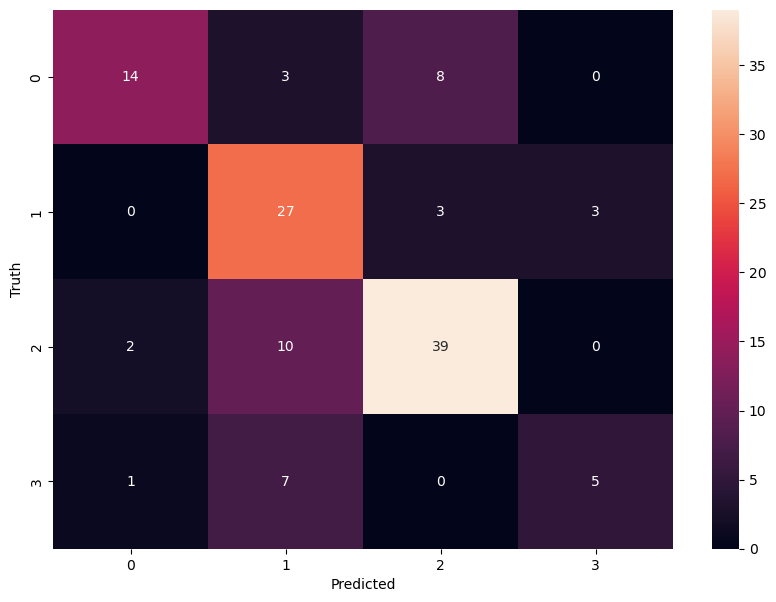

In [253]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

cm = confusion_matrix(y_test, grid_search.predict(X_test))
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [254]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report


print(classification_report(y_test, grid_search.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.56      0.67        25
           1       0.57      0.82      0.68        33
           2       0.78      0.76      0.77        51
           3       0.62      0.38      0.48        13

    accuracy                           0.70       122
   macro avg       0.70      0.63      0.65       122
weighted avg       0.72      0.70      0.69       122



--------------
Decision Tree
--------------

In [226]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [244]:
y_test.shape

(122,)

In [249]:
# y_train_indices = np.argmax(y_train, axis=1)
# y_test_indices = np.argmax(y_test, axis=1)

In [245]:
clf = DecisionTreeClassifier(random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [246]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5327868852459017


In [247]:
data_dct = np.array([-443.96453857421875, 85.13563537597656, -11.147299766540527, 16.660886764526367, -10.00002670288086, 14.551834106445312, -8.243165969848633, 17.92148208618164, -0.3243314325809479, 12.276244163513184, -5.247748374938965, 15.364527702331543, 1.54629647731781, 13.093499183654785, -1.539583683013916, 8.686129570007324, -5.438440322875977, 8.264595985412598, -0.43482348322868347, 8.314236640930176, -2.569923162460327, 6.6740593910217285, -0.9513773918151855, 5.544179916381836, 1.8018430471420288, 7.192022800445557, 0.4802970886230469, 3.570270299911499, 1.1058474779129028, 4.54152774810791, 0.8791283965110779, 3.949103593826294, 0.8270987868309021, 2.6818554401397705, 2.4899473190307617, 4.432705879211426, 4.035713195800781, 2.787639856338501, 2.7522668838500977, 2.547948122024536],dtype=np.float32)

In [248]:
input_data = data_dct.reshape(1, -1)

predictions = clf.predict(input_data)

print("Predicted Class:", predictions)

Predicted Class: [3]


Text(95.72222222222221, 0.5, 'Truth')

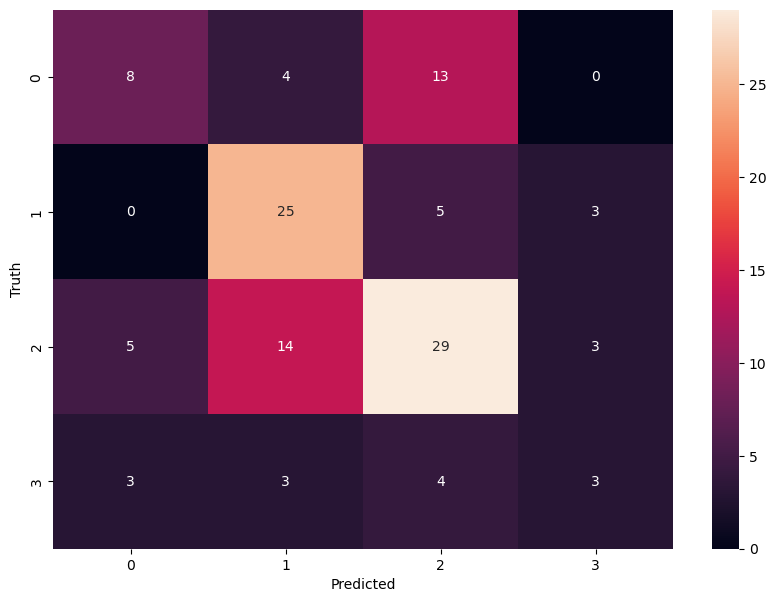

In [252]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

cm = confusion_matrix(y_test, clf.predict(X_test))
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [255]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.50      0.32      0.39        25
           1       0.54      0.76      0.63        33
           2       0.57      0.57      0.57        51
           3       0.33      0.23      0.27        13

    accuracy                           0.53       122
   macro avg       0.49      0.47      0.47       122
weighted avg       0.52      0.53      0.52       122



--------------------------
Model Creation
Basic Neural Network
--------------------------

In [19]:
import tensorflow as tf
print(tf.__version__)

2.13.0


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [256]:
### No of classes
# num_labels=y.shape[1]

In [22]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [24]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [27]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 1500
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/1500
 1/16 [>.............................] - ETA: 0s - loss: 0.7169 - accuracy: 0.6562
Epoch 1: val_loss improved from inf to 1.07919, saving model to saved_models\audio_classification.hdf5
16/16 [==============================] - 0s 29ms/step - loss: 0.6626 - accuracy: 0.7043 - val_loss: 1.0792 - val_accuracy: 0.6148
Epoch 2/1500
 1/16 [>.............................] - ETA: 0s - loss: 0.9099 - accuracy: 0.6875
Epoch 2: val_loss improved from 1.07919 to 1.05901, saving model to saved_models\audio_classification.hdf5
16/16 [==============================] - 0s 9ms/step - loss: 0.7072 - accuracy: 0.6940 - val_loss: 1.0590 - val_accuracy: 0.6230
Epoch 3/1500
 1/16 [>.............................] - ETA: 0s - loss: 0.7049 - accuracy: 0.6250
Epoch 3: val_loss did not improve from 1.05901
16/16 [==============================] - 0s 3ms/step - loss: 0.6913 - accuracy: 0.7084 - val_loss: 1.0980 - val_accuracy: 0.6066
Epoch 4/1500
 1/16 [>.............................] - ETA: 0s - los

In [90]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])


0.6721311211585999


In [251]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

cm = confusion_matrix(y_test, model.predict(X_test))
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

4/4 [==============================] - 0s 1ms/step


ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

-------------
Testing on Unseen Data

In [171]:
# import librosa
# import librosa.display
# import IPython.display as ipd
# import matplotlib.pyplot as plt

# plt.figure(figsize=(14, 5))

# data, sample_rate = librosa.load(filename)

# librosa.display.waveshow(data, sr=sample_rate)

# ipd.Audio(filename)


In [146]:
filename_a='C:/Users/oceanvue/Desktop/DeepShip Dataset/Tug/50/50.wav'

In [172]:
def features_extractor_a(file):
    audio, sample_rate = librosa.load(file, res_type='kaiser_fast')
    print('File',file)
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    return mfccs_scaled_features

In [147]:
data_a = features_extractor_a(filename_a)

data_a

File C:/Users/oceanvue/Desktop/DeepShip Dataset/Tug/50/50.wav
Filename :  C:\Users\oceanvue\Desktop\DeepShip Dataset\Tug\69\69.wav


In [155]:
import csv

# Specify the file name
file_name = "data.csv"

# Open the CSV file in write mode
with open(file_name, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    
    # Write the header
    csvwriter.writerow(["Features"])
    
    # Write each row of data
    csvwriter.writerow(data_a)

In [198]:
data_a = np.array([-351.6251220703125, 86.87262725830078, -14.980208396911621, 21.255037307739258, -7.73253870010376, 14.597578048706055, -4.065438270568848, 14.520508766174316, -7.565308570861816, 7.251713752746582, -12.63511848449707, 11.389244079589844, -7.161518096923828, 8.563867568969727, -7.485435485839844, 7.836484432220459, -8.054036140441895, 7.75935173034668, -2.1260573863983154, 9.105515480041504, -5.119012355804443, 9.686153411865234, -0.6119974851608276, 8.580057144165039, -0.3746771812438965, 6.184450626373291, -1.5594793558120728, 4.869048118591309, -0.8257060050964355, 3.443204879760742, -2.2900235652923584, 3.8444955348968506, 0.8544185757637024, 3.3699796199798584, -0.6715084314346313, 2.617696762084961, 0.010052064433693886, 2.966982126235962, 2.9261598587036133, 7.463899612426758],dtype=np.float32)

In [201]:
data_a.shape

(40,)

In [200]:
input_data = data_a.reshape(1, -1)

predictions = model.predict(input_data)

predicted_class = np.argmax(predictions)

print("Predicted Class:", predicted_class)

1/1 [==============================] - 0s 14ms/step
Predicted Class: 0
